In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fit_polynomial(x_train, y_train, degree, x_test):
    # Fit polynomial on one variable
    
    num_points = len(x_train)
    
    features = np.ones((num_points,1))
    for d in range(1,degree+1):
        features = np.concatenate((features, x_train[:,None]**d), axis=1)

    features_full = np.ones((len(x_test),1))
    for d in range(1,degree+1):
        features_full = np.concatenate((features_full, x_test[:,None]**d), axis=1)

        
    w_hat = np.dot(np.linalg.pinv(features), y_train)
    
    y_test = np.dot(features_full, w_hat)
    
    return y_test, w_hat
    
    
    

(32,)
(32,)
(32, 4)
(202, 4)


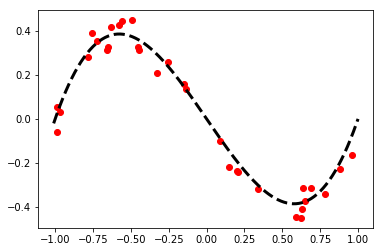

In [34]:
np.random.seed(100)

# (x,y) data with x drawn uniformly in [-1,1] and y = x^3 - x + noise.

num_points = 32
degree = 3

# x = np.arange(-1.,1.001, 2/(num_points-1))
x = np.random.rand(num_points)*2 -1
x_axis = np.arange(-1.01,1.01,0.01)


# w =np.random.rand(degree+1)*2 - 1 # coeffient w_0,...,w_5

w = np.array([0.,-1, 0, 1.])

features = np.ones((num_points,1))
for d in range(1,degree+1):
    features = np.concatenate((features, x[:,None]**d), axis=1)

features_full = np.ones((len(x_axis),1))
for d in range(1,degree+1):
    features_full = np.concatenate((features_full, x_axis[:,None]**d), axis=1)


y = np.dot(features, w)+ 0.05*np.random.randn(num_points)
y_full = np.dot(features_full,w)

print(x.shape)
print(y.shape)

print(features.shape)
print(features_full.shape)
plt.plot(x,y,'ro')
plt.plot(x_axis, y_full,'k--', lw=3)



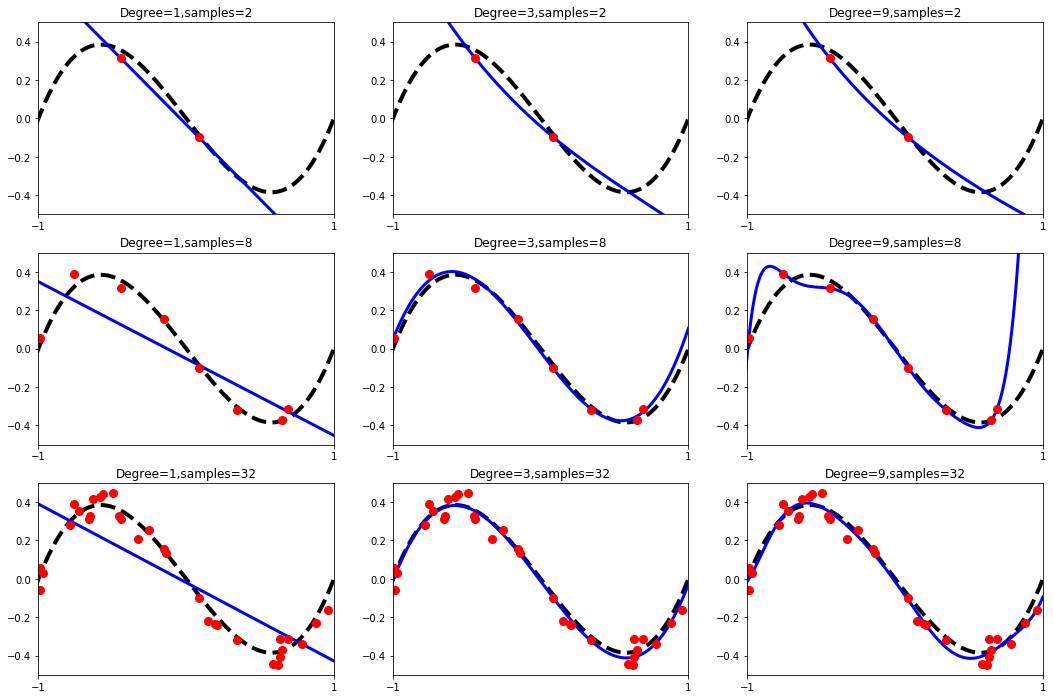

In [33]:


i=1
sample_sizes=[2,8,32]
degrees=[1,3,9]
plt.figure(figsize=(18,12))

for sample_size in sample_sizes:
    for degree in degrees:
        plt.subplot(len(sample_sizes),len(degrees),i)
        i+=1
        y_test_pred, w_est = fit_polynomial(x[:sample_size], y[:sample_size], degree, x_axis)
        plt.title('Degree='+str(degree)+ ',samples='+str(sample_size))
        plt.axis([-1,1,-0.5,0.5])
        plt.xticks([-1.,1.])
        plt.plot(x_axis, y_full, 'k--', lw=4)
        plt.plot(x_axis, y_test_pred, 'b-', lw=3)
        plt.plot(x[:sample_size],y[:sample_size],'ro', ms=8)
        